### Question 1)
Read the given dataset as a dataframe and check for missing values

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# solution code
df = pd.read_csv("jewel.csv")
checkNull = pd.isnull(df)
display(df[checkNull])


,carat,cut,color,clarity,depth,table,price,x,y,z
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
53935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53937,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Question 2)
Create line plots for 'y', 'z', 'depth', and 'table' attributes versus price separately in order to check for potential outliers.

<AxesSubplot:xlabel='table'>

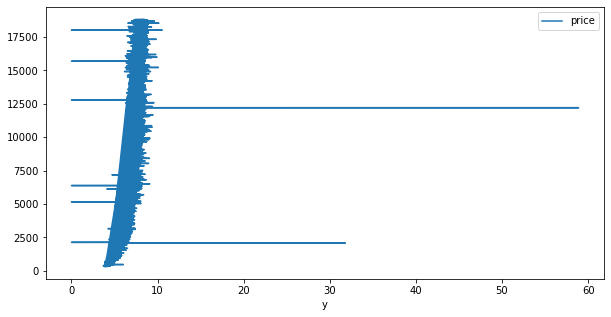

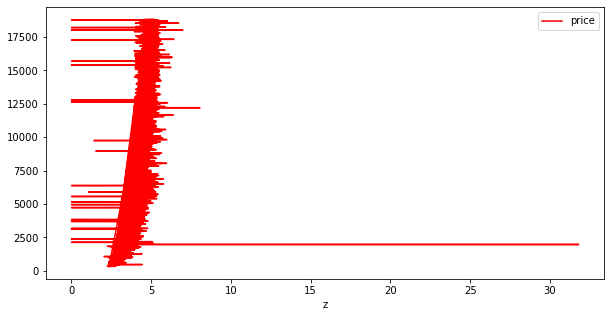

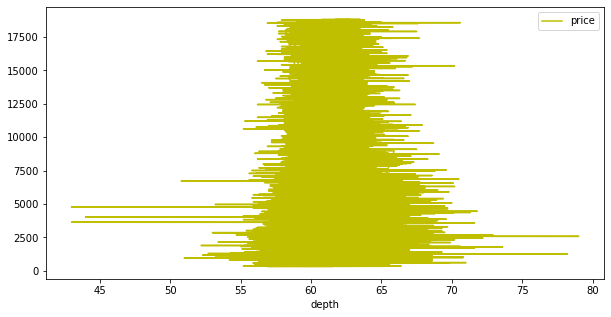

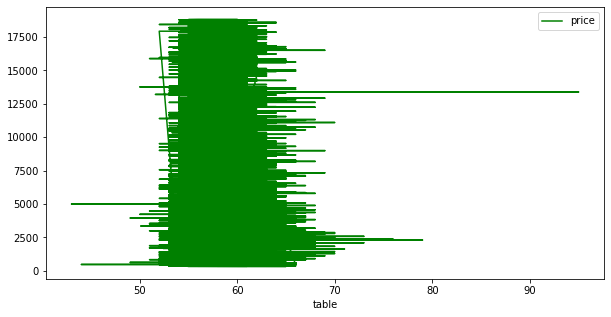

In [4]:
# solution code
pivot1 = pd.pivot_table(data = df, values = ['y','z','depth','table'], columns = 'price')
plt.rcParams["figure.figsize"] = [10.0,5.0]
df.plot(kind = "line", x = 'y', y='price')
df.plot(kind = "line", x = 'z', y= 'price',color = "r")
df.plot(kind = "line", x = 'depth', y= 'price',color = "y")
df.plot(kind = "line", x = 'table', y= 'price',color = "g")



### Question 3)

Find and remove outliers by analyzing the above output of question 2. Explain your outlier detection process.

<ipython-input-5-e570be3cebe9>:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
<ipython-input-5-e570be3cebe9>:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


<AxesSubplot:xlabel='table'>

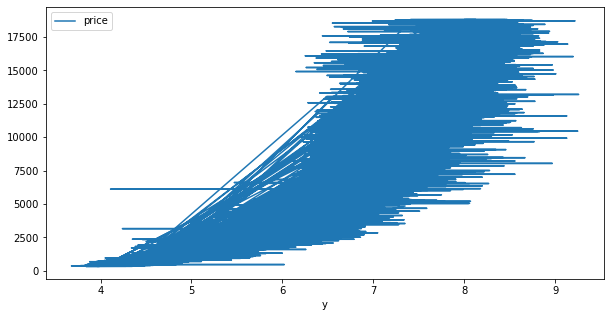

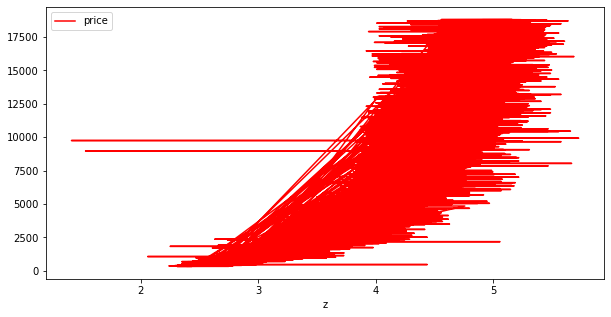

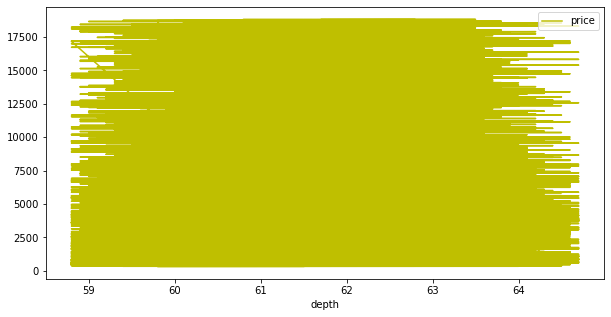

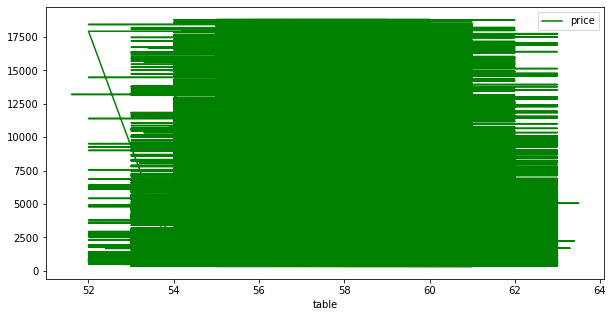

In [5]:
# solution code

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

cols = ['y','z','depth','table']

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

df.plot(kind = "line", x = 'y', y='price')
df.plot(kind = "line", x = 'z', y= 'price',color = "r")
df.plot(kind = "line", x = 'depth', y= 'price',color = "y")
df.plot(kind = "line", x = 'table', y= 'price',color = "g")

# I used interquartilerange (IQR) process for detection of outliers. Then updated the dataframe. 




In [6]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


### Question 4)
Replace ordinal values (cut, color, clarity) according to rules below:
- For "cut": 'Good':1, 'Very Good':2, 'Fair':3, 'Ideal':4, 'Premium':5
- For "color": 'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7
- For "clarity": 'I1':1, 'SI1':2, 'SI2':3, 'VS1':4, 'VS2':5, 'VVS1':6, 'VVS2':7, 'IF':8

In [7]:
# solution code
cut_dict = {
    'Good': 1,
    'Very Good':2,
    'Fair':3,
    'Ideal':4,
    'Premium':5
}
cutlist = df['cut'].to_numpy()
cutlist = [cut_dict[letter] for letter in cutlist]
df.drop('cut', axis = 1) 
df['cut'] = cutlist


color_dict ={
    'J':1,
    'I':2,
    'H':3,
    'G':4,
    'F':5,
    'E':6,
    'D':7
}
colorlist = df['color'].to_numpy()
colorlist = [color_dict[letter] for letter in colorlist]
df.drop('color', axis = 1) 
df['color'] = colorlist

clarity_dict = {
    'I1':1,
    'SI1':2,
    'SI2':3,
    'VS1':4, 
    'VS2':5,
    'VVS1':6,
    'VVS2':7,
    'IF':8
}
claritylist = df['clarity'].to_numpy()
claritylist = [clarity_dict[letter] for letter in claritylist]
df.drop('clarity', axis = 1) 
df['clarity'] = claritylist
df



<ipython-input-7-002f1759fa5b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cut'] = cutlist
<ipython-input-7-002f1759fa5b>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['color'] = colorlist
<ipython-input-7-002f1759fa5b>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,6,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,5,6,2,59.8,61.0,326,3.89,3.84,2.31
3,0.29,5,2,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,1,3,63.3,58.0,335,4.34,4.35,2.75
5,0.24,2,1,7,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,4,7,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,7,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,2,7,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,5,3,3,61.0,58.0,2757,6.15,6.12,3.74


### Question 5)
Create bar graphs for 'cut', 'color', and 'clarity' attributes with their new values to analyze the dataset visually.


Text(0.5, 0, 'clarity')

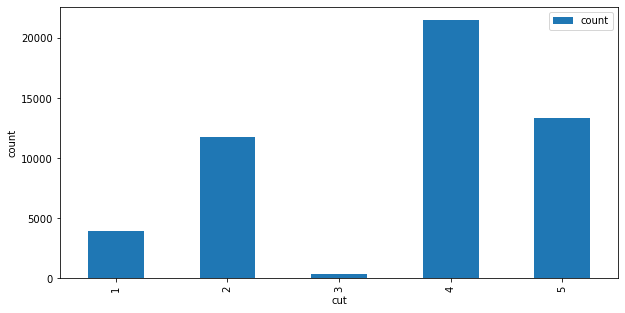

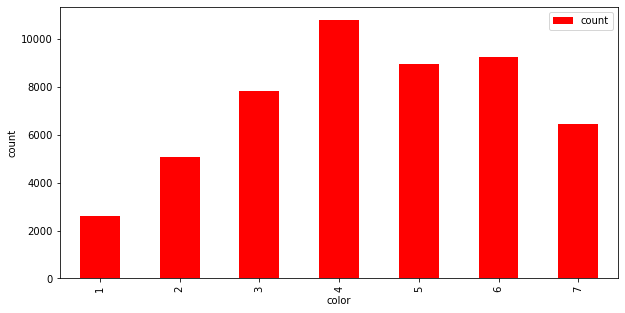

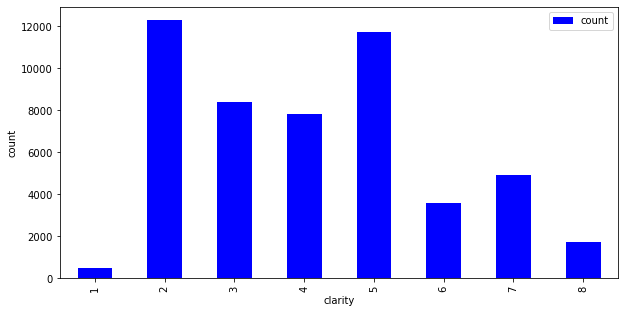

In [8]:
# solution code
plt.rcParams["figure.figsize"] = [10.0,5.0]
df2 = df.groupby(['cut']).size().reset_index(name='count')
plot = df2.plot.bar(x= 'cut',y = 'count')
plot.set_ylabel("count")
plot.set_xlabel("cut")

df2 = df.groupby(['color']).size().reset_index(name='count')
plot = df2.plot.bar(x= 'color',y = 'count',color = "r")
plot.set_ylabel("count")
plot.set_xlabel("color")

df2 = df.groupby(['clarity']).size().reset_index(name='count')
plot = df2.plot.bar(x= 'clarity',y = 'count',color = "b")
plot.set_ylabel("count")
plot.set_xlabel("clarity")



### Question 6)
Shuffle the data points and split the dataset into training and testing set, with a 0.7-0.3 ratio (training set will be %70, and test set will be %30 of the dataset) (Write your own shuffling and spliting code here, do not use predefined function train_test_split).



In [9]:
# solution code

train=df.sample(frac=0.7, random_state=100)
test = df[~df.index.isin(train.index)]


X= df.drop('price',axis =1)
y = df['price']

x_train = train.drop('price', axis=1)
y_train = train['price']

x_test = test.drop('price', axis = 1)
y_test = test['price']

### Question 7)

Create an instance of kNN with a number of neighbors between 1-30, then fit kNN regression model to train data. Then, make prediction and calculate mean squared error (MSE). Calculate MSE for k value between 1-30 and print them. Finally, create elbow function to find best k value and plot the elbow curve. Explain how you find the best k-value.

In [10]:
# solution code
from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 

scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

mse_val = [] #to store mse values for different k
for K in range(30):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = mean_squared_error(y_test,pred) #calculate mse
    mse_val.append(error) #store mse values
    print('MSE value for k= ' , K , 'is:', error)

MSE value for k=  1 is: 793041.2869007913
MSE value for k=  2 is: 646101.3039860048
MSE value for k=  3 is: 610244.4135039494
MSE value for k=  4 is: 591597.5726898175
MSE value for k=  5 is: 583654.2140317834
MSE value for k=  6 is: 583604.0848084204
MSE value for k=  7 is: 583504.5028701691
MSE value for k=  8 is: 577811.3156104898
MSE value for k=  9 is: 589203.3324613607
MSE value for k=  10 is: 596881.0126211497
MSE value for k=  11 is: 600191.9484523657
MSE value for k=  12 is: 608897.8484461629
MSE value for k=  13 is: 614171.8508802989
MSE value for k=  14 is: 618663.414058423
MSE value for k=  15 is: 624711.8374366912
MSE value for k=  16 is: 626493.4593365276
MSE value for k=  17 is: 630495.4570332097
MSE value for k=  18 is: 632557.8958495314
MSE value for k=  19 is: 640157.5822308526
MSE value for k=  20 is: 645740.5830150088
MSE value for k=  21 is: 646745.9896907033
MSE value for k=  22 is: 650697.2062879584
MSE value for k=  23 is: 651961.906754767
MSE value for k=  24 i

<AxesSubplot:>

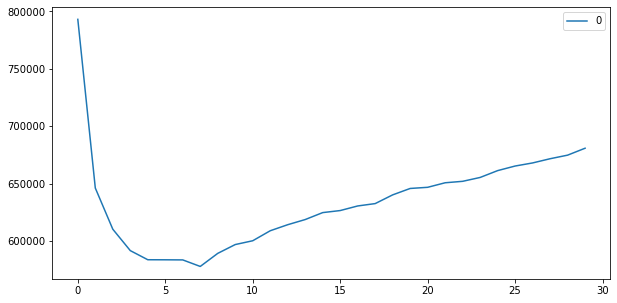

In [11]:
elbow = pd.DataFrame(mse_val) #elbow curve 
elbow.plot()

# BEST k value is k=5. When we look at the elbow curve, the minimum error value occurs when k=5. To get this curve I used
# knn regression model. According to the k value, I create a model and then I used libraries for making prediction.Then,
# I calculate the mse value with  mean_squared_error() function.

### Question 8)

Run 10-Fold Cross validation (CV) and print accuracy values for each run of CV. Also print the final average accuracy of the model.

In [12]:
# solution code
from sklearn.model_selection import cross_val_score
knn_cv = neighbors.KNeighborsRegressor(n_neighbors = 8) # our most successful k value is 5 and defaultly kNeighborsClassifier() function takes n as 5.
knn_cv.fit(x_train,y_train)
cv_accuracy = cross_val_score(knn_cv, x_train, y_train, cv=10)
for i in range(0,10):
    print("Accuracy for run = {} is: ".format(i+1), cv_accuracy[i])
print('cv_accuracy average is:{}'.format(np.mean(cv_accuracy)))

Accuracy for run = 1 is:  0.9602403381284725
Accuracy for run = 2 is:  0.9619381845084771
Accuracy for run = 3 is:  0.9527816458098353
Accuracy for run = 4 is:  0.9623294999173567
Accuracy for run = 5 is:  0.9609513054502079
Accuracy for run = 6 is:  0.9588366874098904
Accuracy for run = 7 is:  0.9665658563547139
Accuracy for run = 8 is:  0.9603683484886774
Accuracy for run = 9 is:  0.9580075518467444
Accuracy for run = 10 is:  0.962389908141321
cv_accuracy average is:0.9604409326055696


### Question 9)

Predict the price of new jewel data with the following custom features. 

features_array: [0.3,3.90,2.98,2.56,2,2,2]

In [13]:
# solution code
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)
test_set = [[0.3,2,2,2,62.4,55,3.9,2.98,2.56]]
prediction = knn.predict(test_set)
print("Prediction of price with given values is: ",prediction[0])


NameError: name 'KNeighborsRegressor' is not defined

In [15]:
correlations = train.corr() # To see the impacts of the attributes to the predicting.
p = correlations['price']
p.sort_values(ascending = False).head(10)

price      1.000000
carat      0.926776
y          0.891257
x          0.890111
z          0.887423
table      0.139334
cut        0.026711
depth     -0.007446
clarity   -0.103359
color     -0.169911
Name: price, dtype: float64